In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [8]:
test = ImageDataGenerator(rescale=1/255)


train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
                                  
train_dataset = train_datagen.flow_from_directory("COVID-CT-master/Dataset/train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("COVID-CT-master/Dataset/test/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

val_dataset = test.flow_from_directory("COVID-CT-master/Dataset/val/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 425 images belonging to 2 classes.
Found 203 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'COVID': 0, 'NonCOVID': 1}

In [9]:

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:

#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,
         epochs = 10,
         validation_data = val_dataset
       
         )

Epoch 1/10
14/14 [==============================] - 19s 1s/step - loss: 0.7387 - accuracy: 0.5341 - val_loss: 0.6956 - val_accuracy: 0.4746
Epoch 2/10
14/14 [==============================] - 16s 1s/step - loss: 0.6644 - accuracy: 0.5529 - val_loss: 0.8106 - val_accuracy: 0.3729
Epoch 3/10
14/14 [==============================] - 16s 1s/step - loss: 0.6534 - accuracy: 0.5953 - val_loss: 0.7115 - val_accuracy: 0.4831
Epoch 4/10
14/14 [==============================] - 16s 1s/step - loss: 0.6569 - accuracy: 0.6118 - val_loss: 0.7444 - val_accuracy: 0.5000
Epoch 5/10
14/14 [==============================] - 16s 1s/step - loss: 0.6235 - accuracy: 0.6165 - val_loss: 0.8676 - val_accuracy: 0.4661
Epoch 6/10
14/14 [==============================] - 16s 1s/step - loss: 0.6229 - accuracy: 0.6306 - val_loss: 0.7387 - val_accuracy: 0.4746
Epoch 7/10
14/14 [==============================] - 16s 1s/step - loss: 0.6460 - accuracy: 0.6071 - val_loss: 0.7841 - val_accuracy: 0.5169
Epoch 8/10
14/14 [==

In [17]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("NonCovid",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("Covid",fontsize=30)


1/1 [==============================] - 0s 102ms/step
[[1.]]
1/1 [==============================] - 0s 33ms/step
[[2.1876029e-30]]
1/1 [==============================] - 0s 32ms/step
[[1.]]


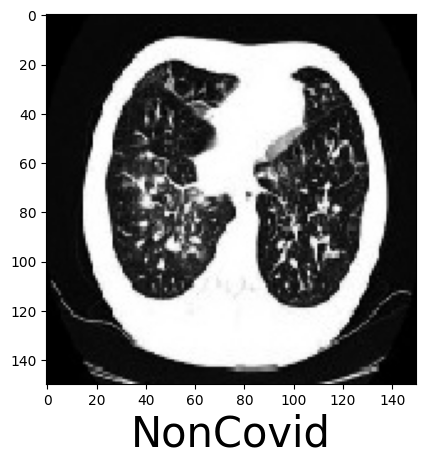

In [18]:
predictImage("COVID-CT-master/Dataset/test/NonCOVID/0.jpg")
predictImage("COVID-CT-master/Dataset/test/COVID/2020.03.12.20034686-p17-91-1.png")
predictImage("COVID-CT-master/Dataset/test/NonCOVID/4%3.jpg")

In [12]:
#Calcing the accuracy of the model
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc)

7/7 [==============================] - 2s 326ms/step - loss: 0.6867 - accuracy: 0.5961
Test accuracy: 0.5960590839385986
